# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from wordcloud import WordCloud

### Importing Restaurant Data in CSV Format for EDA Analysis  

In [8]:
data = pd.read_csv("/content/zomato_restaurants_in_India.csv", engine='python')

#### Checking Both header and Tail for checking that the data is correctly imported or not

In [9]:
data.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [10]:
data.tail(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171164,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


### Checking Unique Value for City and then Checking data against some cities

In [11]:
data.city.nunique()

99

In [12]:
data.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [13]:
data[data["city"]=="Mumbai"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


In [14]:
data[data["city"]=="Pune"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,['Fine Dining'],https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,['Lounge'],https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,['Fine Dining'],https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,['Fine Dining'],https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,['Fine Dining'],https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,['Casual Dining'],https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,['Casual Dining'],https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1
168661,18767059,Mapro Garden,['Casual Dining'],https://www.zomato.com/pune/mapro-garden-lonav...,"3 & 4, Old Mumbai - Pune Highway, Valvan, Lona...",Pune,5,Lonavala,18.760234,73.419775,...,2,Rs.,"['Dinner', 'Takeaway Available', 'No Alcohol A...",4.3,Very Good,143,227,0.0,-1,-1
168662,6503906,Hotel Chandralok,['Casual Dining'],https://www.zomato.com/pune/hotel-chandralok-l...,"Near Bus Stand & Post Office, Opposite Mumbai-...",Pune,5,Lonavala,18.753223,73.405655,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.3,Very Good,317,86,0.0,-1,-1


In [15]:
data[data["city"]=="Amravati"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
13262,18932816,Jazeerah Restaurant,['Casual Dining'],https://www.zomato.com/amravati/jazeerah-resta...,"sunderlal chowk, jail road, camp road Amravati...",Amravati,11335,Ambapeth,20.931615,77.777557,...,2,Rs.,[],4.3,Very Good,46,4,0.0,-1,-1
13263,18875387,New Punjabi Dhaba & Restaurant,['Quick Bites'],https://www.zomato.com/amravati/new-punjabi-dh...,"Nanda Market, Rajapeth to Dastur Nagar Road, R...",Amravati,11335,Ambapeth,20.918997,77.758964,...,1,Rs.,"['Cash', 'Credit Card', 'Debit Card']",4.5,Excellent,25,2,0.0,-1,-1
13264,18834861,New Eagle Restaurant,['Casual Dining'],https://www.zomato.com/amravati/new-eagle-rest...,"Railway Station Square, Amravati - 444601, Nea...",Amravati,11335,Nai Basti,20.929917,77.758619,...,1,Rs.,"['Cash', 'Debit Card', 'Credit Card']",4.6,Excellent,31,1,0.0,1,-1
13265,18834865,Al Basheer Restaurant,['Casual Dining'],https://www.zomato.com/amravati/al-basheer-res...,"Itwara Bajar, Bus Stand Road, Amravati - 44460...",Amravati,11335,Nai Basti,20.932979,77.750417,...,1,Rs.,"['Cash', 'Debit Card', 'Credit Card']",4.4,Very Good,29,1,0.0,1,-1
13266,18875533,Sahuji Ka Dhaba,['Casual Dining'],https://www.zomato.com/amravati/sahuji-ka-dhab...,Maltekdi Rd,Amravati,11335,Ambapeth,20.929585,77.758360,...,1,Rs.,['Cash'],4.2,Very Good,19,21,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,18875533,Sahuji Ka Dhaba,['Casual Dining'],https://www.zomato.com/amravati/sahuji-ka-dhab...,Maltekdi Rd,Amravati,11335,Ambapeth,20.929585,77.758360,...,1,Rs.,['Cash'],4.2,Very Good,19,21,0.0,-1,-1
15110,18938366,Panino The Sandwich World,['Casual Dining'],https://www.zomato.com/amravati/panino-the-san...,"Badnera Road, Navada chowk, Ambapeth, Amravati",Amravati,11335,Ambapeth,20.908408,77.751317,...,1,Rs.,"['Cash', 'Credit Card', 'Takeaway Available', ...",4.1,Very Good,8,1,0.0,1,-1
15111,18875436,Raai Jeera Veg & Desi Restaurant,['Casual Dining'],https://www.zomato.com/amravati/raai-jeera-veg...,"Raai Jeera Restaurant, Rajapeth, amravati - 44...",Amravati,11335,Ambapeth,20.923487,77.753297,...,1,Rs.,"['Cash', 'Debit Card', 'Credit Card']",3.7,Good,9,6,0.0,1,-1
15112,18939392,Cafe Eatalious,[],https://www.zomato.com/amravati/cafe-eatalious...,"Near D Mart, Sai Nagar, Badnera Road, Amravati",Amravati,11335,Sai Nagar,20.898238,77.747560,...,1,Rs.,['Cash'],4.1,Very Good,16,3,0.0,1,-1


# Shape, Info and Description of Data

In [16]:
data.shape

(211944, 26)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [18]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [19]:
data[data["average_cost_for_two"]==30000]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
136240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
136740,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
137240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1


In [20]:
data[data["average_cost_for_two"]==250]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
20,3400297,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-daya...,"Heera Bagh, Khel Gaon, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.219114,78.008505,...,1,Rs.,"['Delivery', 'Breakfast', 'Lunch', 'Takeaway A...",3.9,Good,417,52,0.0,1,-1
24,3400469,Papa Ji Da Dhaba,['Dhaba'],https://www.zomato.com/agra/papa-ji-da-dhaba-c...,"Delhi Gate, Raja Mandi Station Road, Civil Lin...",Agra,34,Civil Lines,27.196198,77.998530,...,1,Rs.,"['No Alcohol Available', 'Takeaway Available',...",4.1,Very Good,402,14,0.0,1,-1
53,3400304,The Big Bun,['Quick Bites'],https://www.zomato.com/agra/the-big-bun-civil-...,"Khandari Crossing, Civil Lines, Agra",Agra,34,Civil Lines,27.205766,77.996897,...,1,Rs.,"['Lunch', 'Takeaway Available', 'Dinner', 'Air...",4.2,Very Good,225,31,0.0,1,-1
63,18943864,Om Sai Ram Bhojhnalaya,['Bhojanalya'],https://www.zomato.com/agra/om-sai-ram-bhojhna...,"Near Isbt Transport Nagar, Sikandra, Agra",Agra,34,Sikandra,27.208422,77.978758,...,1,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",4.1,Very Good,162,2,0.0,1,-1
346,3400304,The Big Bun,['Quick Bites'],https://www.zomato.com/agra/the-big-bun-civil-...,"Khandari Crossing, Civil Lines, Agra",Agra,34,Civil Lines,27.205766,77.996897,...,1,Rs.,"['Lunch', 'Takeaway Available', 'Dinner', 'Air...",4.2,Very Good,225,31,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211623,3200857,Flavor Restaurant,['Quick Bites'],https://www.zomato.com/vadodara/flavor-restaur...,"B1, Mangaldhara Complex, 83/Sampatrao Colony, ...",Vadodara,32,Alkapuri,22.309392,73.175171,...,1,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.0,Very Good,922,24,0.0,-1,-1
211665,3201196,Infi Pizzeria,['Quick Bites'],https://www.zomato.com/vadodara/infi-pizzeria-...,"GF-9, Lotus Elite, Gotri-Sevasi Road, Gotri, V...",Vadodara,32,Gotri,22.315952,73.130434,...,1,Rs.,"['Lunch', 'Cash', 'Dinner', 'Takeaway Availabl...",4.7,Excellent,518,162,0.0,-1,-1
211667,3201865,The Spot,['Quick Bites'],https://www.zomato.com/vadodara/the-spot-mandv...,"1, Bhandra Kacheri Road, Syedwada, Chhipwad, V...",Vadodara,32,Mandvi,22.300992,73.214621,...,1,Rs.,"['Lunch', 'Dinner', 'Cash', 'Takeaway Availabl...",4.5,Excellent,381,19,0.0,1,-1
211672,3200237,Yo Frankie,['Quick Bites'],https://www.zomato.com/vadodara/yo-frankie-niz...,"Opp Gelani Petrol Pump,Nizampura Road, Nizampu...",Vadodara,32,Nizampura,22.330503,73.181055,...,1,Rs.,"['Delivery', 'No Alcohol Available', 'Cash', '...",4.2,Very Good,404,7,0.0,-1,-1


### Removing Duplicates and Checking Null values

In [21]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape

(55568, 26)

In [22]:
data.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,18
city,0
city_id,0
locality,0
latitude,0
longitude,0


### Checking Unique Values for Establishment Column and Removing Unnesscary Inverted Commas

In [23]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [24]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


In [25]:
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


#### Checking Length and Unique Length for Cities

In [26]:
len(data[data["city"]=="Shimla"])

218

In [27]:
len(data[data["city"]=="Mumbai"])

2022

In [28]:
len(data["city"].unique())

99

In [29]:
data["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [30]:
data[data["city"]=="Trichy"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
193113,18733781,Grill Chicken,Quick Bites,https://www.zomato.com/trichy/grill-chicken-th...,"32, Thillai Nagar Road, Thillai Nagar, Trichy",Trichy,11332,Thillai Nagar,10.826222,78.684750,...,2,Rs.,"['Lunch', 'Delivery', 'Debit Card', 'No Alcoho...",4.8,Excellent,257,12,0.0,-1,-1
193114,18732938,KFC,Quick Bites,https://www.zomato.com/trichy/kfc-sangillyanda...,"6, Bharathiyar Salai, Cantonment, Sangillyanda...",Trichy,11332,Sangillyandapuram,10.798672,78.686328,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",4.1,Very Good,261,11,0.0,1,-1
193115,18732973,KMS Hakkim,Casual Dining,https://www.zomato.com/trichy/kms-hakkim-thill...,"5, Sastri Road, Near Passport Office, North Ea...",Trichy,11332,Thillai Nagar,10.825473,78.686408,...,2,Rs.,"['Delivery', 'Debit Card', 'Dinner', 'Takeaway...",4.4,Very Good,236,15,0.0,-1,-1
193116,18734828,Hotel Raja,Casual Dining,https://www.zomato.com/trichy/hotel-raja-sangi...,"28, Rockins Road, Sangillyandapuram, Trichy",Trichy,11332,Sangillyandapuram,10.795380,78.683255,...,1,Rs.,"['Delivery', 'Credit Card', 'Lunch', 'Takeaway...",3.8,Good,133,15,0.0,1,-1
193117,18734096,Barbeque Nation,Casual Dining,https://www.zomato.com/trichy/barbeque-nation-...,"3rd Floor, Mangalam Towers, Cantonment, Reynol...",Trichy,11332,Sangillyandapuram,10.807078,78.681474,...,3,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Debit Card',...",4.9,Excellent,613,211,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194549,18734022,Hot Chips,Casual Dining,https://www.zomato.com/trichy/hot-chips-woraiy...,"G7, Chithra Complex, Chathiram Bus Stand, Tric...",Trichy,11332,Woraiyur,10.832966,78.692884,...,1,Rs.,"['Takeaway Available', 'Debit Card', 'Lunch', ...",0.0,Not rated,2,1,0.0,-1,-1
194550,18733654,Super Virunthu,Quick Bites,https://www.zomato.com/trichy/super-virunthu-s...,"Old Thiruvalluvar Bus Stand, Cantonment, Sangi...",Trichy,11332,Sangillyandapuram,10.796156,78.682495,...,1,Rs.,"['Cash', 'Breakfast', 'Lunch', 'Dinner', 'Take...",0.0,Not rated,2,1,0.0,-1,-1
194552,18734004,Rajageethams Restaurant,Casual Dining,https://www.zomato.com/trichy/rajageethams-res...,"Chithra Complex, Chathiram Bus Stand, Trichy, ...",Trichy,11332,Woraiyur,10.833209,78.692910,...,1,Rs.,"['Takeaway Available', 'Dinner', 'Breakfast', ...",0.0,Not rated,1,1,0.0,-1,-1
194553,19123760,JKS Tiffin Centre,Quick Bites,https://www.zomato.com/trichy/jks-tiffin-centr...,"Raja Street, Highways Colony, Ranjitha Puram, ...",Trichy,11332,Sangillyandapuram,10.789086,78.703762,...,1,Rs.,"['Lunch', 'Takeaway Available', 'No Seating Av...",0.0,Not rated,1,0,0.0,-1,-1


### Checking data for locality, country, cuisines, timings

In [31]:
data["locality"].nunique()

3731

In [32]:
data["country_id"].unique()

array([1])

In [33]:
data["locality_verbose"].nunique()

3910

In [34]:
print(data["cuisines"].nunique())
print(data["cuisines"].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [35]:
data["cuisines"] = data["cuisines"].fillna("No cuisine")

In [36]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


In [37]:
print(data["timings"].nunique())
print(data["timings"].unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


#### Checking data for average cost for two, price range, currency, highlights

In [38]:
data["average_cost_for_two"].nunique()

145

In [39]:
data["price_range"].unique()

array([2, 1, 3, 4])

In [40]:
data["currency"].unique()

array(['Rs.'], dtype=object)

In [41]:
print(data["highlights"].nunique())
print(data["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [42]:
hl = []
data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


### Mean, Min and Max for aggreagte rating for restaurants

In [43]:
data[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


In [44]:
data["opentable_support"].unique()

array([ 0., nan])

In [45]:
data["delivery"].unique()

array([-1,  1,  0])

In [46]:
data["takeaway"].unique()

array([-1])

# Exploratory Data Analysis (EDA)


### Chains Vs Outlets

In [47]:
outlets = data["name"].value_counts()

In [48]:
outlets

,count
name,
Domino's Pizza,399
Cafe Coffee Day,315
KFC,204
Baskin Robbins,202
Keventers,189
...,...
Boulevard 69,1
7-Eleven Restaurant,1
Food station,1


In [49]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [50]:
data.shape

(55568, 26)

In [51]:
chains

,count
name,
Domino's Pizza,399
Cafe Coffee Day,315
KFC,204
Baskin Robbins,202
Keventers,189
...,...
Lallu Baker's Hut,2
Saleem Punjabi Dhaba,2
Suruchi,2


In [52]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


### Top restaurant chains (by number of outlets)
Let's plot a horizontal bar graph to look at Top 10 restaurant chains. For the color scheme, we are using a list of pre-defined and selected colours to make the chart more appealing. If you want your analysis to look good visually, you should customize each and every element of your graph.

In [53]:
chains.head(10)

,count
name,
Domino's Pizza,399
Cafe Coffee Day,315
KFC,204
Baskin Robbins,202
Keventers,189
Subway,178
McDonald's,130
Pizza Hut,125
Barbeque Nation,112


In [54]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

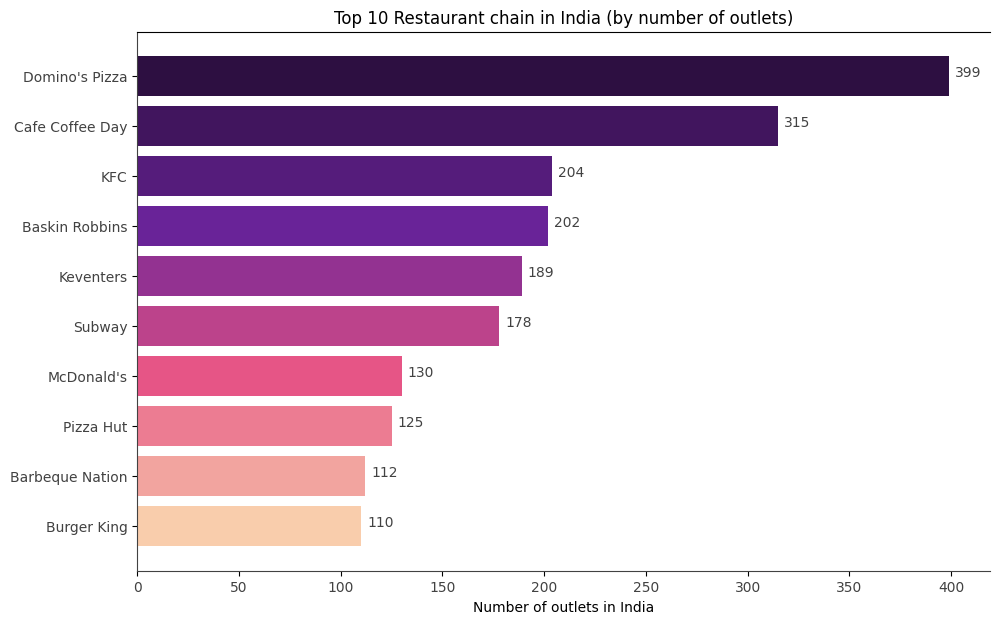

In [55]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

This chart is majorly dominaed by big fast food chains



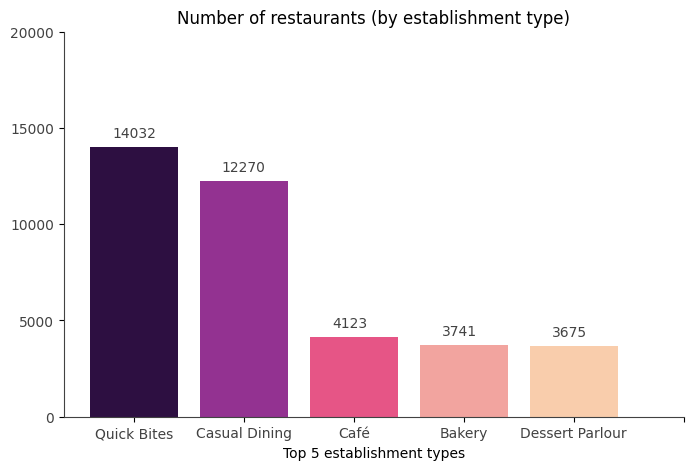

In [56]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

Top 3 represents more casual and quick service restaurants, then from 4-6 we have dessert based shops.

##### Average rating, votes and photos (by Establishment)
Here, we will not plot each graph since it will make this notebook filled with horizontal bar charts. I see horizontal bar charts the only option to display results of this kind when we have lots of classes to compare (here 10 classes). Let's look at value_counts( ) directly

# Cities

### Number of Restaurants(By City)

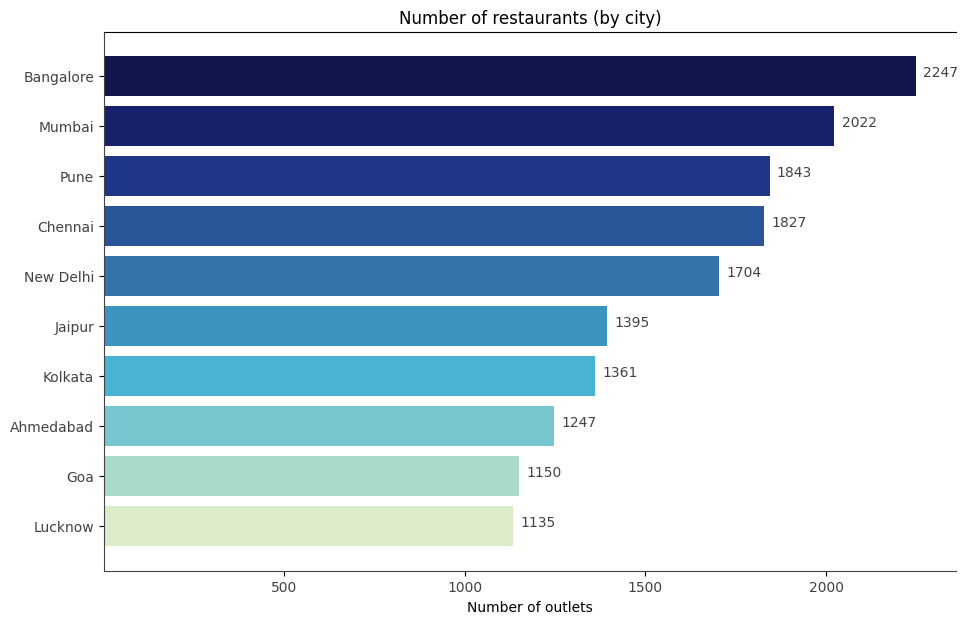

In [57]:
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

# Cuisine

### Unique Cuisines

In [58]:
print("Total number of unique cuisines =",data.cuisines.nunique())


Total number of unique cuisines = 9383


### Number of restaurants (by cuisine)

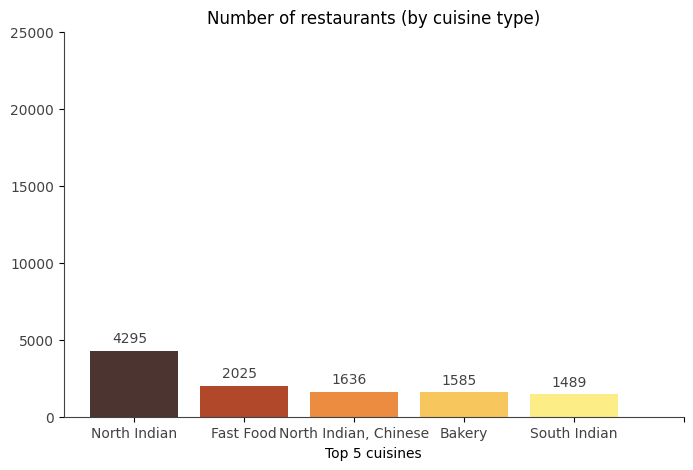

In [59]:
c_count = data.cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")


plt.show()

As we can see from above bar graph North Indian food is dominating with huge margin while south indian food is least favourite cuisine among people.

### Number of Restaurant (by highlights)

In [60]:
print("Total number of unique cuisines = ", data.highlights.nunique())

Total number of unique cuisines =  31228


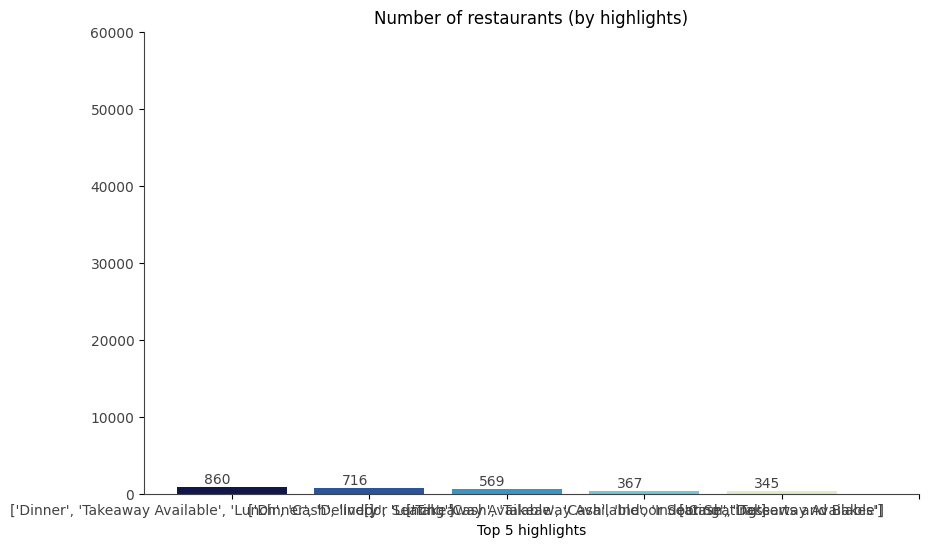

In [61]:
h_count = data.highlights.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()

##### From above highlights it is clearly visible that the dinner is preferred among most people.

### Highlights wordcloud
##### Here we will create a wordcloud of top 30 highlights

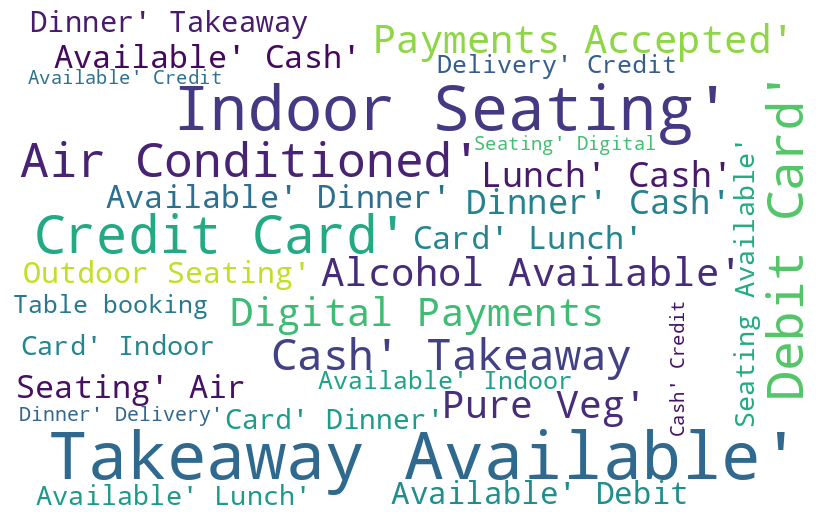

In [62]:
h1 = data["highlights"]

hl_str = " ".join(map(str, h1.dropna()))

wordcloud = WordCloud(
    width=800, height=500,
    background_color='white',
    min_font_size=10, max_words=30
).generate(hl_str)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


# Ratings and cost
### Ratings distribution
##### Let's see how the ratings are distributes

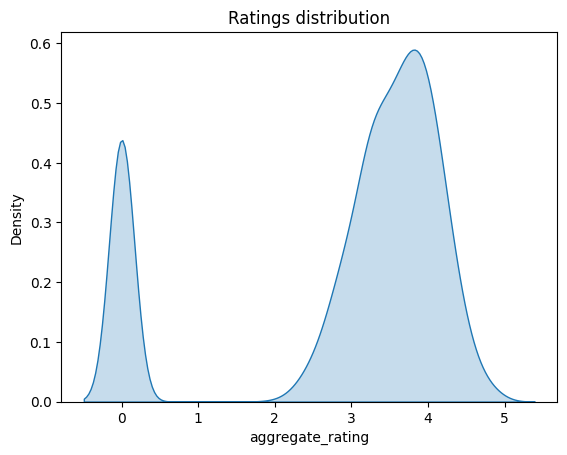

In [63]:
sm.kdeplot(data['aggregate_rating'], fill=True)
plt.title("Ratings distribution")
plt.show()

### Average Cost for 2 Distribution

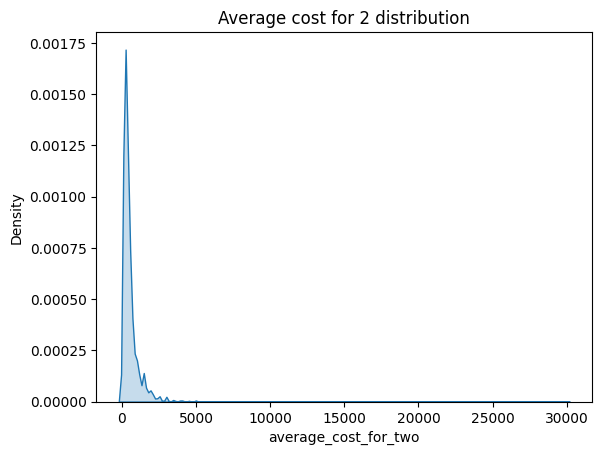

In [64]:
sm.kdeplot(data['average_cost_for_two'], fill=True)
plt.title("Average cost for 2 distribution")
plt.show()

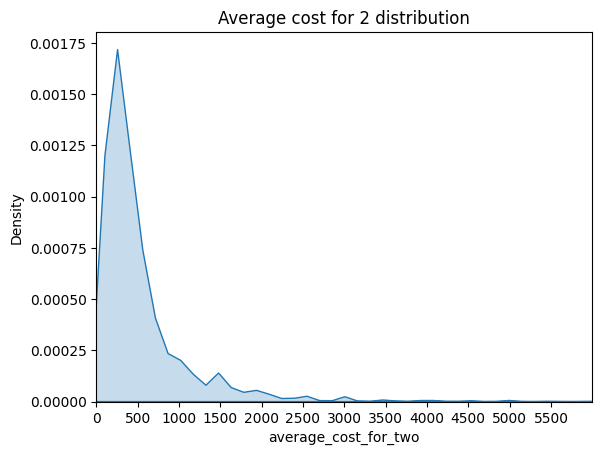

In [65]:
sm.kdeplot(data['average_cost_for_two'], fill=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

### Price Range

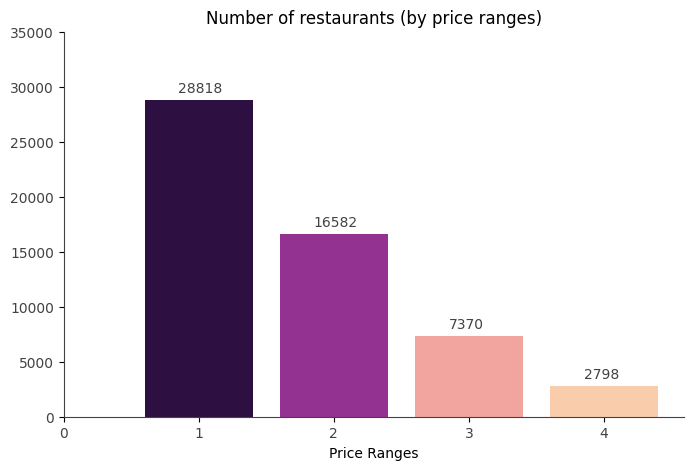

In [66]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()

### Relationship Between Average Cost and Rating

In [67]:
corr_matrix = data[["average_cost_for_two", "aggregate_rating"]].corr()
result = np.round(corr_matrix["average_cost_for_two"].iloc[1], 2)

print(result)

0.25


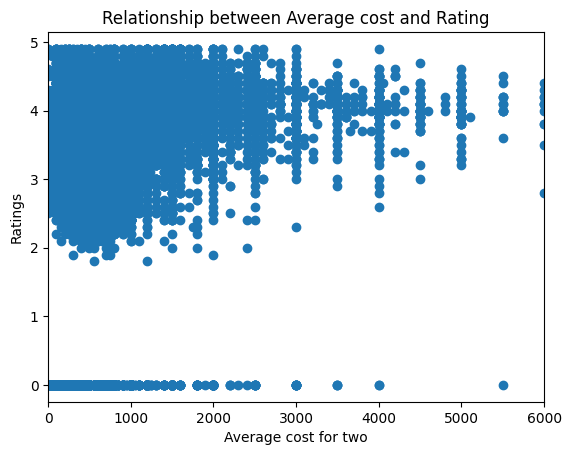

In [68]:
plt.plot("average_cost_for_two","aggregate_rating", data=data, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

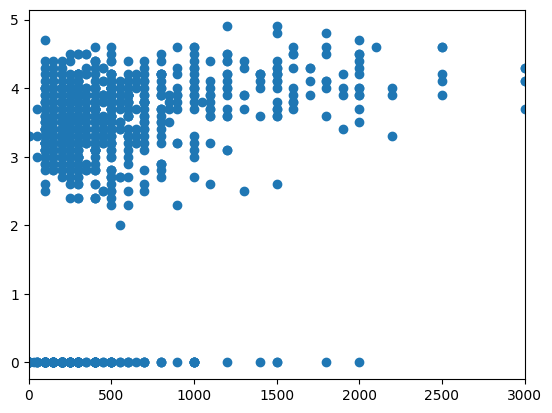

In [69]:
plt.plot("average_cost_for_two","aggregate_rating", data=data.sample(1000), linestyle="none", marker="o")
plt.xlim([0,3000])
plt.show()

### Relationship Between Price Range and Ratings

In [70]:
corr_matrix = data[["price_range", "aggregate_rating"]].corr()
result = np.round(corr_matrix["price_range"].iloc[1], 2)

print(result)

0.25


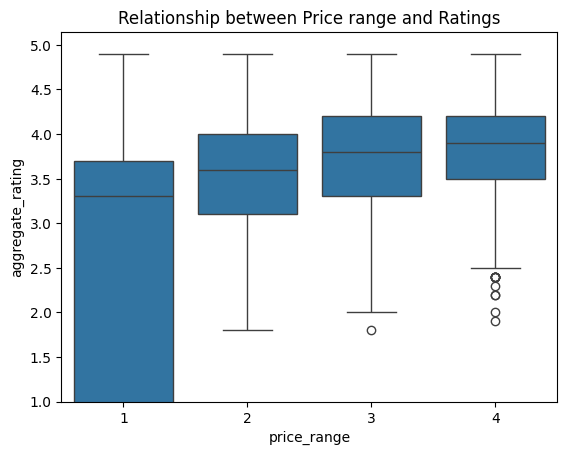

In [71]:
sm.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

From the above result it is now clear that the restaurants which provide more services and charge more have aggregate ratings and overall ratings
higher than others.

# Conclusions

### After working on this data, we can conclude the following things:-

##### 1) Domino's Pizza is no 1 among food chains in fast food category.
##### 2) After Domino's Pizza, Cafe Coffee Day and KFC are the biggest fast food chains in the country with most number of outlets
##### 3) Burger King has the least number of Fast food Chains as per the data.
##### 4) Quick bites and casual dining type of establishment have most number of outlets while desert parlour has least number of numbers.
##### 5) Chennai and mumbai has most number of restaurants while ajmer has least number of restaurants.
##### 6) North Indian is the most prefered cuisine in India and south indian is the least preferred cuisine as per the data.
##### 7) As per the highlights indoor seating and takeaway available are mostly preferred by customers.
##### 8) Most restaurants are rated between 3 and 4
##### 9) Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
